In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'My Drive'/programming/fast/digikala/q3

Mounted at /content/drive
/content/drive/My Drive/programming/fast/digikala/q3


In [2]:
pwd = %pwd
pwd

'/content/drive/My Drive/programming/fast/digikala/q3'

In [2]:
%ls

nlp_comments_users.zip  Untitled0.ipynb


In [4]:
!unzip nlp_comments_users.zip

Archive:  nlp_comments_users.zip
  inflating: test_users.csv          
  inflating: train_users.csv         


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
train_valid = pd.read_csv('train_users.csv').fillna('Nan')
X_train, X_valid, y_train, y_valid = train_test_split( train_valid.drop(['verification_status','rate'],axis=1),
                                                      train_valid[['verification_status','rate']],
                                                      test_size=0.1, random_state=42)
test = pd.read_csv('test_users.csv')

In [26]:
X_train

,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
37827,37827,Nan,هم با ارزش و کاربردی و هم قیمت مناسب,Nan,Nan,برس پاکسازی پوست مدل beauty skin,ابزار مراقبت از پوست,1
133340,133340,مرجوعش کردم,صداش بده،یه مقدارم بیرون میره صدا،یکی از گوشی ...,Nan,Nan,هدفون مدل In-Ear Fit,هدفون، هدست و هندزفری,1
246072,246072,کاور گیتار,بسیار خوش قیمت,Nan,Nan,هارد کیس گیتار مدل black,کیس و کاور,1
17014,17014,Nan,برا تقسیم کشو عالیه,Nan,Nan,نظم دهنده کشو مدل Colorful بسته 3 عددی,کمد لباس و ارگانایزر,1
45150,45150,پاوربانک ای دیتا,با سلام. گارانتی به اتمام رسیده و معتبر نبود,Nan,Nan,شارژر همراه ای دیتا مدل PT100 ظرفیت 10000 میلی...,پاوربانک (شارژر همراه),1
...,...,...,...,...,...,...,...,...
119879,119879,قبلا استفاده کردم,راضیم ازش,"[""کیفیت مناسب""]",Nan,باتری سکه ای سونی مدل CR2032 بسته 2 عددی,باتری استاندارد,1
259178,259178,Nan,بسیار خوب و بدون قطعی,Nan,Nan,چندراهی برق و محافظ پارت الکتریک مدل 2160,چندراهی برق و محافظ ولتاژ,1
131932,131932,کابل,صدا رو خوب انتقال میده,Nan,Nan,کابل AUX کنفی به طول 1 متر,کابل صوتی و تصویری,1
146867,146867,خوب,به نسبت خوبه کارمو راه میندازه,Nan,Nan,صلوات شمار خاتم مدل BLK-7599,صلوات شمار,1


In [9]:
train['title_fa_category'].nunique()

663

In [5]:
from fastai import *
from fastai.text import *

In [6]:
data = TextLMDataBunch.from_df(pwd,train_df=X_train,valid_df=X_valid)

In [7]:
data.label_list

LabelLists;

Train: LabelList (237959 items)
x: LMTextList
xxbos xxmaj nan,xxbos مرجوعش کردم,xxbos کاور گیتار,xxbos xxmaj nan,xxbos پاوربانک ای دیتا
y: LMLabelList
,,,,
Path: /content/drive/My Drive/programming/fast/digikala/q3;

Valid: LabelList (26440 items)
x: LMTextList
xxbos خیلی خوبه,xxbos نمی xxunk,xxbos خوب بود,xxbos کارت حافظه microsdhc سیلیکون پاور مدل xxmaj xxunk xxmaj xxunk کلاس 10 استاندارد xxup xxunk - i xxup u1 سرعت xxunk ظرفیت 32 گیگابایت,xxbos حجم کم
y: LMLabelList
,,,,
Path: /content/drive/My Drive/programming/fast/digikala/q3;

Test: None

In [30]:
data.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,xxbos نان تست xxbos xxmaj nan xxbos کتاب xxunk در قیامت xxbos پک مزمز xxbos xxmaj nan xxbos xxmaj nan xxbos خوبه xxbos xxmaj nan xxbos خوب بود xxbos سفت نبودن درب شیکر xxbos گوشی xxmaj a21s xxbos کیفیت خوب xxbos نرم کننده xxbos راضیم xxbos کیفیت xxbos بدک نیست . xxbos xxmaj nan xxbos xxmaj nan xxbos xxmaj nan xxbos xxmaj nan xxbos رب گوجه طبیعت xxbos مناسب xxbos
1,قیمت عالیه xxbos خوب و مناسب و مطمین xxbos xxmaj nan xxbos xxunk ام xxbos xxmaj nan xxbos تلفن بیسیم xxbos خیلی خوبه xxbos xxmaj nan xxbos xxmaj nan xxbos xxmaj nan xxbos تقویت کننده ابرو xxbos xxmaj nan xxbos صندل مردانه xxbos تسکو xxbos بد نیست xxbos xxmaj nan xxbos برا خرید مناسبه xxbos عالی xxbos xxmaj nan xxbos کالای ایرانی با کیفیت xxbos عالی xxbos حتما بخرید !
2,و با دوام xxbos نظر سنجی xxbos xxunk کالا xxbos عالی xxbos xxmaj nan xxbos خوب با قیمت مناسب xxbos بروکلی xxbos xxmaj nan xxbos خوبه xxbos xxmaj nan xxbos خو و کار راه انداز xxbos مناسب xxbos خوبه بد نیست xxbos عالی xxbos xxmaj nan xxbos xxmaj nan xxbos کیفیت xxbos عالی xxbos xxmaj nan xxbos شیائومی xxbos کابل افزایش xxbos کارت حافظه xxbos xxmaj nan xxbos خوشمزه xxbos
3,xxbos عالی ست xxbos xxmaj nan xxbos دوجی xxbos xxmaj nan xxbos میلاد xxbos xxmaj nan xxbos xxmaj nan xxbos xxmaj nan xxbos کیفیت ساخت افتضاح xxbos بی کیفیت xxbos xxmaj nan xxbos xxmaj nan xxbos قلم لمسی xxbos xxmaj nan xxbos xxmaj nan xxbos عالی xxbos پد روزانه xxbos واس من اشتباه فرستادن xxbos xxmaj nan xxbos کیفیت xxbos 0.2وات به جای0.5وات xxbos xxmaj nan xxbos نود الیت xxbos
4,و خوش دست و زیبا xxbos هدفون بیسیم xxup qcy - xxup m1 xxup pro xxbos بادکنک xxbos xxmaj nan xxbos مناسب برای انتقال و هدیه xxbos xxmaj nan xxbos ناراضی xxbos کیف پشت صندلی xxbos عالی کارایی بالا داره xxbos xxmaj nan xxbos ماکارونی میکس تک xxbos xxmaj nan xxbos قیمت خوب xxbos پنیر روزانه xxbos جالبه ولی گره میخوره xxbos کمی تلخ تر xxbos xxmaj nan xxbos پیشنهاد


In [36]:
data = TextList.from_df(df=train_valid,cols = ['title','comment','advantages','disadvantages','title_fa_product','title_fa_category'],path=pwd,)

In [42]:
data = data.split_by_rand_pct(0.05)

In [44]:
data= data.label_from_df('verification_status')

In [45]:
data = data.databunch()

In [46]:
data

TextClasDataBunch;

Train: LabelList (251180 items)
x: TextList
xxbos xxbos xxmaj nan مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه xxmaj nan xxmaj nan ژل ضد عفونی کننده دست شون مدل xxmaj aloevera حجم 300 میلی لیتر ضدعفونی کننده,xxbos xxbos xxmaj redmi 8 با این مبلغ اگه امکانات و ارزش خرید واستون مهمه این گوشی عالیه و بیخودی پول برند نمیدی . [ " رم4 \ r","قیمت نسبت به سایر برندها \ r","طراحی و زیبایی \ r","باتری 5000 و فست شارژ \ r","صدای با حجم بالا و کیفیت مناسب \ r","حافظه داخلی 64 \ r","دوربین " ] [ " نداشتن هندزفری " ] گوشی موبایل شیائومی مدل xxmaj redmi 8 xxup m1908c3ig دو سیم‌ کارت ظرفیت 64 گیگابایت گوشی موبایل,xxbos xxbos عالی خوبه فقط کج و کوله بدستم رسید ولی پسرم خیلی خوشحال شد لطفا در بسته بندی بیشتر توجه بشه xxmaj nan xxmaj nan ماسک کودک طرح سگ نگهبان مدل رابل ایفای نقش,xxbos xxbos xxmaj nan در کل خوب بود ولی متاسفانه درب محصول شکسته بود و مقداریش داخل بسته بندی خالی شده بود . xxmaj nan xxmaj nan مایع ضدعفونی کننده میوه و سبزیجات من مدل xxup wt حجم 500 میلی لیتر ضدعفونی کنند

In [47]:
data.show_batch()

text,target
xxbos xxbos بررسی ایسوس زنفون ۳ نقد و بررسی گوشی ایسوس زنفون 3 \r \n \r \n گوشی زنفون 3 را می‌توان xxunk محصول ایسوس با xxunk راه‌اندازی خط تولید گوشی‌های زنفون دانست . ظرافت در طراحی و سخت‌افزار مناسب دو ویژگی اصلی گوشی xxmaj zenfone 3 xxup ze552kl xxunk 3 xxup xxunk هستند . نکته جالب اینکه این گوشی‌ها را نه می‌توان در دسته گوشی‌های,1
xxbos xxbos بررسی کوتاه خب این گوشی رو حدود یک هفته هست که از بازار خریدم و می‌خوام نظرم رو بدون هیچ تعصبی بیان کنم \r \n اولین چیزی که ممکنه در خرید یه گوشی بهش توجه کنید xxunk که در مورد این گوشی آنچنان که همه میگن پردازنده ضعیفی نداره و اونقدر ها هم قوی نیست بازی های xxup cod xxup mobile و xxup pubg رو راحت اجرا,1
xxbos xxbos میان رده با قیمت پرچم دار با توجه به قیمتی که داره آدم انتظار داره ضعف های کمی داشته اما این شرایط اقتصادی موجود باعث چنین قیمت غیر منطقی شده . من پیش از این htc 10 داشتم که چون پرچم دار بود تا حدودی با خرید این گوشی یکم اون حس قوی رو ندارم با این حال قدرت خرید پرچم دار رو هم ندارم . \r \n,1
xxbos xxbos برترین در همرده ها من خودم بین می بند ۴ و آنر ۵ گیر کرده بودم بعد از تحقیق زیاد و پس از مقایسه مچ بند خودم با مچ بند دوستم این نظرو تایپ میکنم . \r \n مزیت های آنر۵ نسبت به می بند ۴ بیشتره \r \n نشان دادن پیامهای فارسی ، سنجش اکسیژن xxunk متنوع و متعدد از مزیت های آنر ۵ نسبت,1
xxbos xxbos گوشی متوسط سلام دوستان \r \n مطالبی که مینویسم نظر شخصی خودم با سه ماه استفاده از گوشیه من قبلا گوشی ال جی ایکس پاور داشتم غیر از دوربینش از عملکردش راضی بودم متاسفانه از دستم افتاد خورد روی یک سنگ نوک تیز تاچش خرد شد تاچش رو عوض کردم ولی بازم درست نشد بعد از کلی تحقیق نوت 8 پرو گرفتم اهل بازی نیستم با توجه,1


In [48]:
data.save(pwd + '/data_lm.pkl')

In [10]:
data = load_data(pwd, 'data_lm.pkl', bs=32)

In [16]:
data.add_test(test)

In [18]:
learner = text_classifier_learner(data,AWD_LSTM,drop_mult=0.5).to_fp16()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


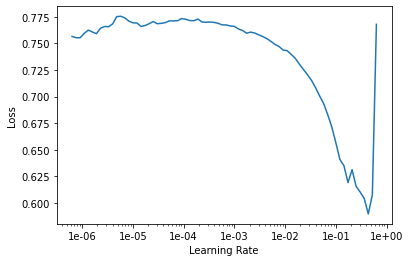

In [12]:
learner.lr_find()
learner.recorder.plot()

In [ ]:
learner.fit_one_cycle(5,slice(3e-04,3e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.140678,0.173409,0.959755,02:18
1,0.176331,0.168503,0.959755,02:24
2,0.157503,0.170521,0.959755,02:26
3,0.165184,0.165774,0.959755,02:29


In [14]:
learner.save(pwd +'/freezed')

In [ ]:
learner.load(pwd +'/freezed')

In [62]:
preds = learner.predict(data.test_ds[1][0])


(Category tensor(1), tensor(1), tensor([0.0587, 0.9413]))

In [50]:
for i in tqdm(range(4530,len(test['id']))):
    preds.append(learner.predict(data.test_ds[i][0])[1])

100%|██████████| 14869/14869 [40:13<00:00,  6.16it/s]


In [49]:
from tqdm import tqdm

In [51]:
DF = pd.DataFrame()

In [52]:
DF['id'] = test['id']
DF['verification_status'] = preds

In [53]:
DF['verification_status'] = DF['verification_status'].apply(lambda x:int(x))

In [58]:
DF.to_csv(pwd + '/verfication.csv')